<a href="https://colab.research.google.com/github/kenlo94/Affordable_Housing_2023/blob/rob_data_analytics/ContraCosta%26Fresno_County.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONTRA COSTA COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['ContraCosta_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving ContraCosta_County.csv to ContraCosta_County.csv
            Contra Costa County
Dates                          
2000-01-31             326309.0
2000-02-29             327503.0
2000-03-31             329254.0
2000-04-30             333091.0
2000-05-31             337419.0
...                         ...
NaT                         NaN
NaT                         NaN
NaT                         NaN
NaT                         NaN
NaT                         NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Contra Costa County
Dates,
2000-01-31,326309.0
2000-02-29,327503.0
2000-03-31,329254.0
2000-04-30,333091.0
2000-05-31,337419.0
...,...
2021-12-31,929241.0
2022-01-31,942453.0
2022-02-28,952414.0


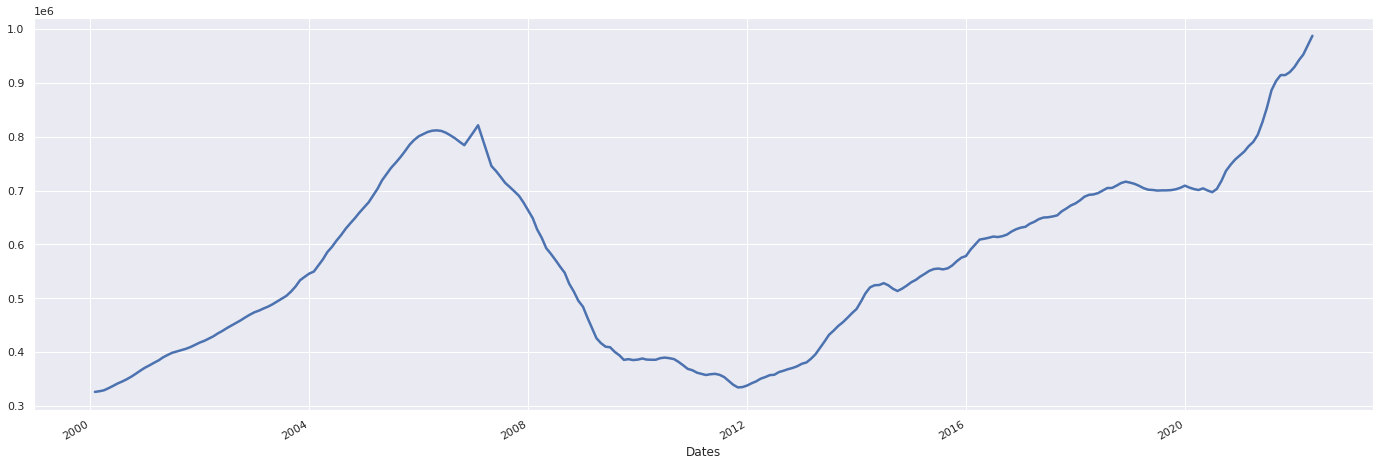

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Contra Costa County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

266

In [ ]:
DATOS = RealData_df['Contra Costa County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(224, 2, 1) (224, 1)
(38, 2, 1) (38, 1)


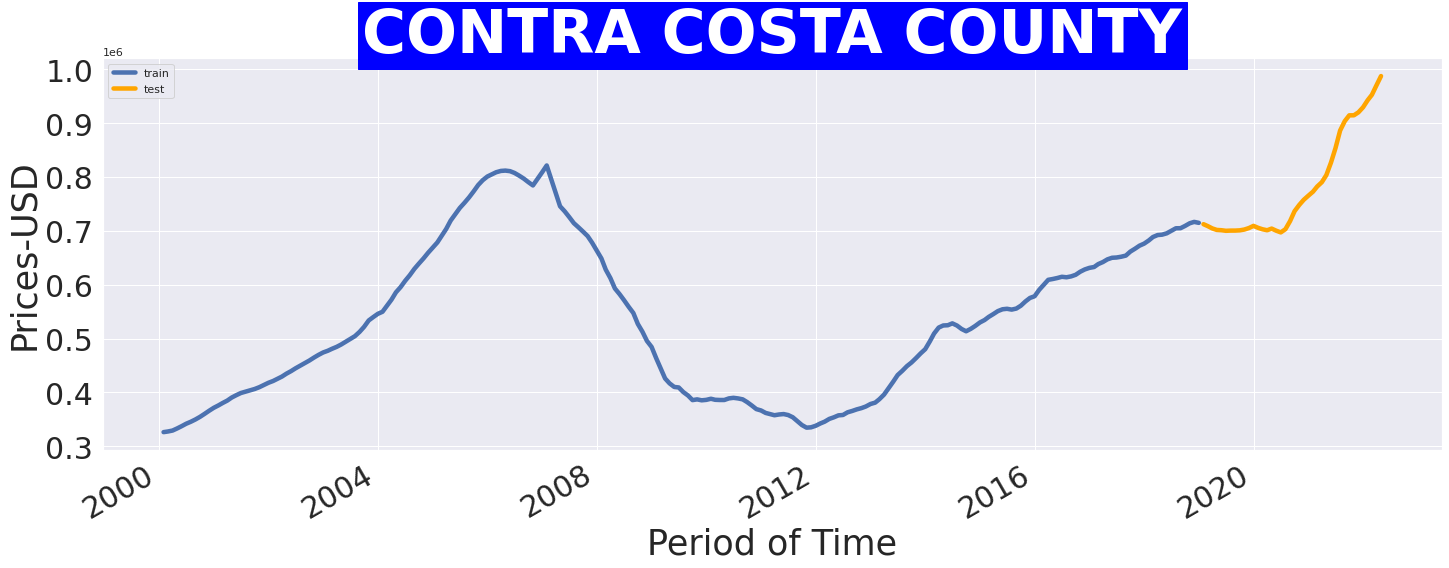

In [ ]:
RealData_df['Contra Costa County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Contra Costa County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("CONTRA COSTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
45/45 [==============================] - 4s 23ms/step - loss: 0.2188 - mean_absolute_error: 0.3999 - val_loss: 0.4483 - val_mean_absolute_error: 0.6173
Epoch 2/60
45/45 [==============================] - 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.1651 - val_loss: 0.0659 - val_mean_absolute_error: 0.2166
Epoch 3/60
45/45 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0460 - val_loss: 0.0156 - val_mean_absolute_error: 0.0912
Epoch 4/60
45/45 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0416 - val_loss: 0.0099 - val_mean_absolute_error: 0.0763
Epoch 5/60
45/45 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0409 - val_loss: 0.0141 - val_mean_absolute_error: 0.0868
Epoch 6/60
45/45 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0412 - val_loss: 0.0072 - val_mean_absolute_error: 0.0677
Epoch 7/60
45/45 [=========

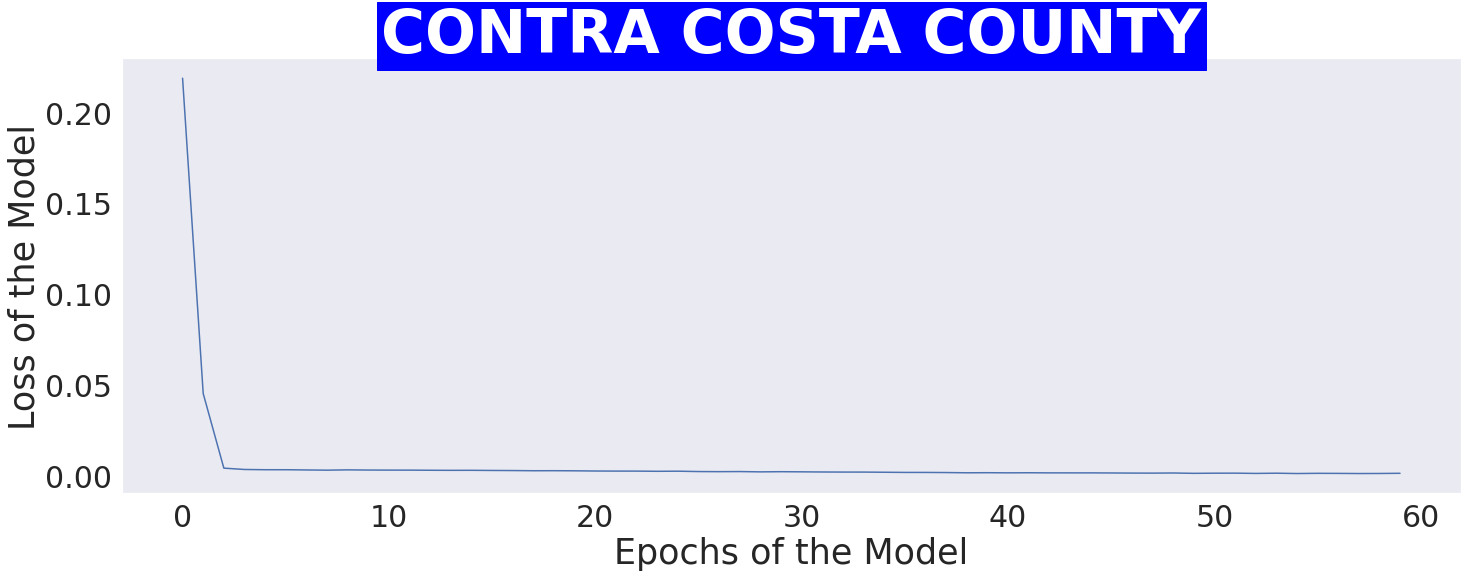

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("CONTRA COSTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.5418071 , 0.52282345, 0.513488  , 0.5138125 , 0.50880677,
       0.51198196, 0.51175755, 0.5140061 , 0.52137244, 0.5336256 ,
       0.5516513 , 0.52796173, 0.5186572 , 0.512141  , 0.5301317 ,
       0.5060776 , 0.49462995, 0.5289016 , 0.5997828 , 0.6780293 ,
       0.71722156, 0.7544113 , 0.78396034, 0.81437564, 0.8562445 ,
       0.88800126, 0.9476737 , 1.0536678 , 1.168953  , 1.3123066 ,
       1.3783803 , 1.4225502 , 1.4184473 , 1.4449621 , 1.4882178 ,
       1.5485356 , 1.5922875 , 1.6746337 ], dtype=float32)

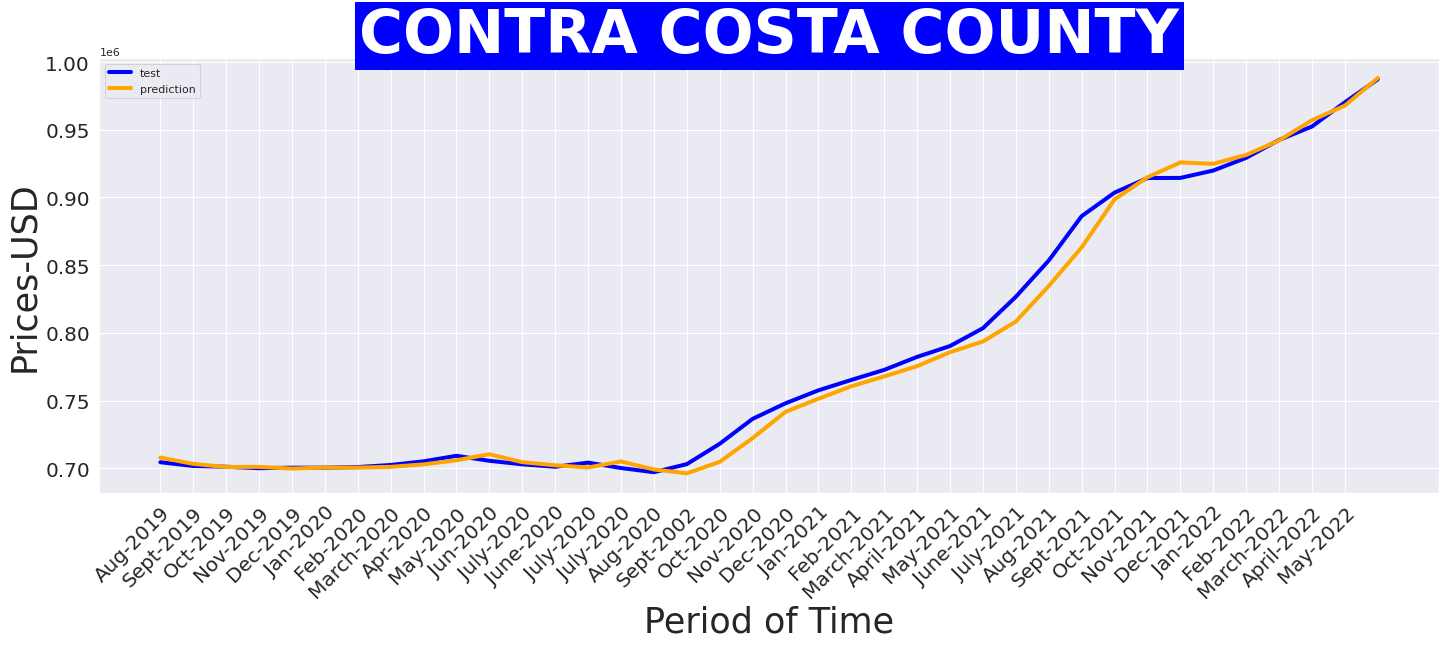

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CONTRA COSTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'CONTRA COSTA COUNTY')

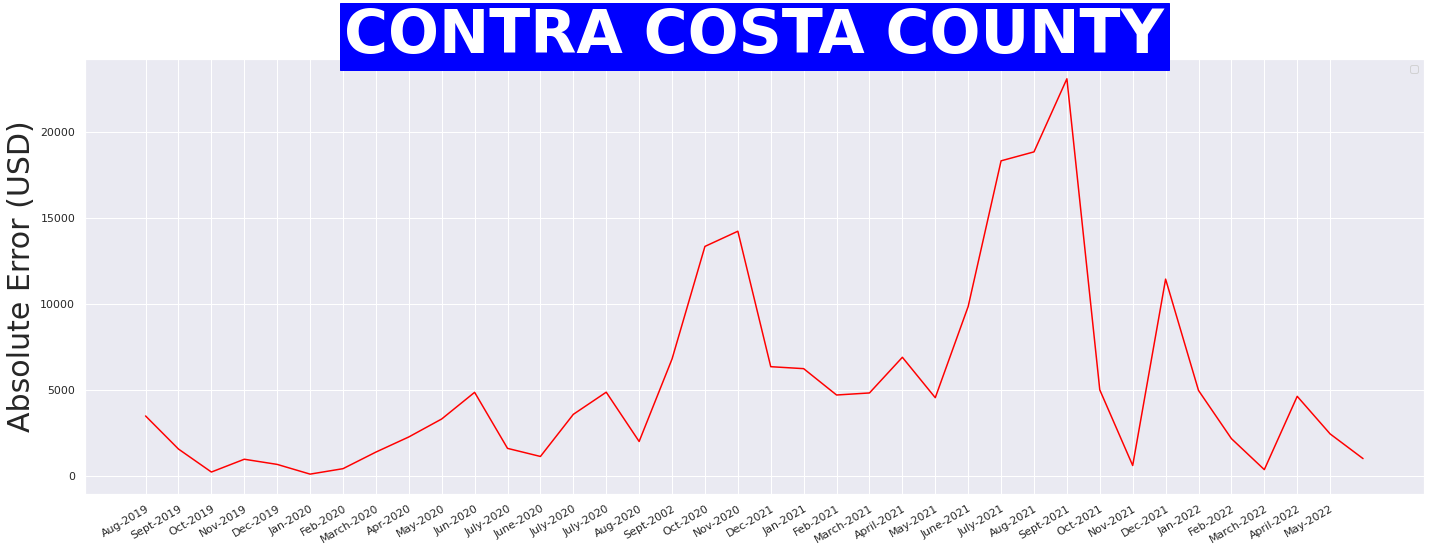

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("CONTRA COSTA COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")

#plt.grid()

In [ ]:
y_pred_inv

array([[707880.06],
       [703181.9 ],
       [700871.56],
       [700951.9 ],
       [699713.  ],
       [700498.8 ],
       [700443.3 ],
       [700999.8 ],
       [702822.8 ],
       [705855.25],
       [710316.3 ],
       [704453.56],
       [702150.8 ],
       [700538.2 ],
       [704990.56],
       [699037.56],
       [696204.5 ],
       [704686.1 ],
       [722228.  ],
       [741592.75],
       [751292.1 ],
       [760495.94],
       [767808.9 ],
       [775336.1 ],
       [785698.  ],
       [793557.2 ],
       [808325.1 ],
       [834556.9 ],
       [863088.  ],
       [898565.56],
       [914917.7 ],
       [925849.  ],
       [924833.56],
       [931395.56],
       [942100.6 ],
       [957028.25],
       [967856.1 ],
       [988235.4 ]], dtype=float32)

# **FRESNO COUNTY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

RealData_df = pd.read_csv(io.BytesIO(uploaded['Fresno_County.csv']), index_col='Dates',parse_dates=True)
print(RealData_df)

Saving Fresno_County.csv to Fresno_County.csv
            Fresno County
Dates                    
2000-01-31       121479.0
2000-02-29       121643.0
2000-03-31       120205.0
2000-04-30       119253.0
2000-05-31       118167.0
...                   ...
NaT                   NaN
NaT                   NaN
NaT                   NaN
NaT                   NaN
NaT                   NaN

[461 rows x 1 columns]


In [ ]:
RealData_df = RealData_df.dropna()
RealData_df

,Fresno County
Dates,
2000-01-31,121479.0
2000-02-29,121643.0
2000-03-31,120205.0
2000-04-30,119253.0
2000-05-31,118167.0
...,...
2021-12-31,364715.0
2022-01-31,370204.0
2022-02-28,375898.0


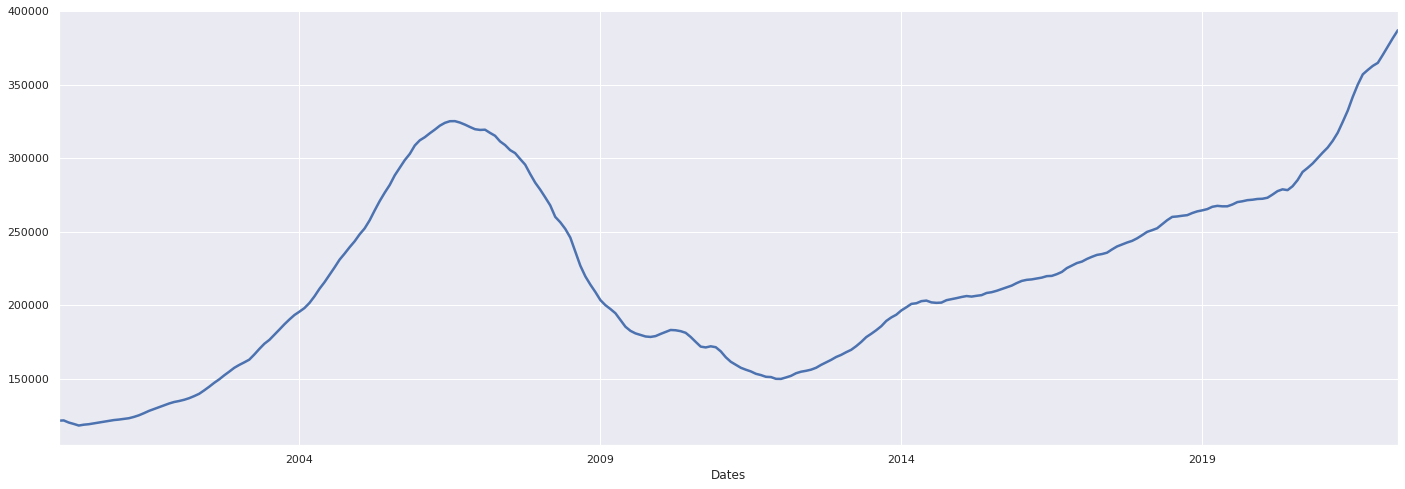

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24, 8)})
RealData_df['Fresno County'].plot(linewidth=2.5);
#RealData_df.plot

In [ ]:
len(RealData_df)

268

In [ ]:
DATOS = RealData_df['Fresno County'].values

# Primero dividamos los sets entre train y test
# En este caso la partición no puede ser aleatoria
# (se debe preservar el orden de la secuencia)
TRAIN_SIZE = 0.85
idx = round(len(DATOS)*TRAIN_SIZE)
datos_train = DATOS[0:idx]
datos_test = DATOS[idx:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler = MinMaxScaler(feature_range=(-1,1))
datos_train_s = scaler.fit_transform(datos_train.reshape(-1,1))
datos_test_s = scaler.transform(datos_test.reshape(-1,1))

LONG_SEC = 2

X_train, Y_train = [], []
for i in range(len(datos_train_s)-LONG_SEC):
  X_train.append(datos_train_s[i:i+LONG_SEC])
  Y_train.append(datos_train_s[i+LONG_SEC])

X_test, Y_test = [], []
for i in range(len(datos_test_s)-LONG_SEC):
  X_test.append(datos_test_s[i:i+LONG_SEC])
  Y_test.append(datos_test_s[i+LONG_SEC])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(226, 2, 1) (226, 1)
(38, 2, 1) (38, 1)


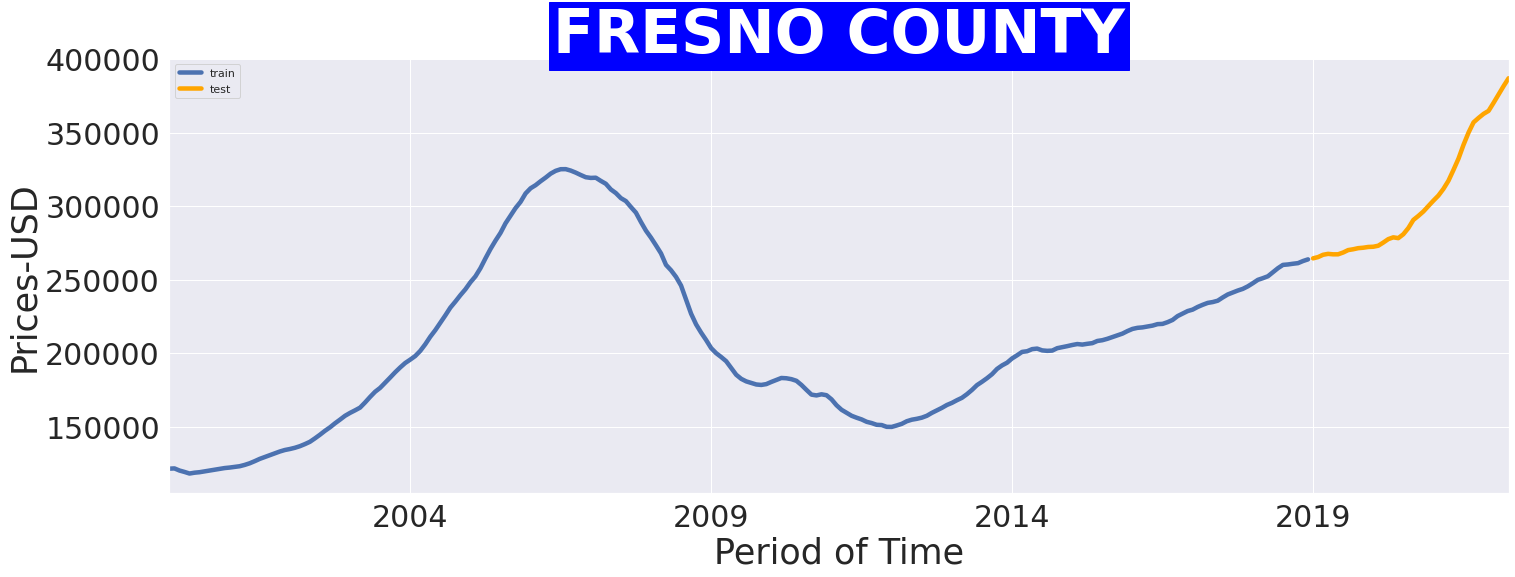

In [ ]:
RealData_df['Fresno County'].iloc[0:idx].plot(linewidth=4.5, label='train', figsize=(24,8))
RealData_df['Fresno County'].iloc[idx:].plot(linewidth=4.5, color='orange', label='test')
plt.title("FRESNO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend();

In [ ]:
# Creating the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Seed for Random Generators
SEED = 88
tf.random.set_seed(SEED)
np.random.seed(SEED)

# El modelo
N_UNITS = 150
modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=(LONG_SEC,1)))
modelo.add(Dense(1))

In [ ]:
# Compilación y entrenamiento
optimizador = RMSprop(learning_rate=0.0005)
modelo.compile(optimizer=optimizador, loss='mse', metrics='mean_absolute_error')

# Entrenamiento
EPOCHS = 60
BATCH_SIZE = 5
modelo.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
           validation_data = (X_test, Y_test))

Epoch 1/60
46/46 [==============================] - 3s 18ms/step - loss: 0.1978 - mean_absolute_error: 0.3604 - val_loss: 0.4281 - val_mean_absolute_error: 0.6072
Epoch 2/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.1559 - val_loss: 0.0370 - val_mean_absolute_error: 0.1641
Epoch 3/60
46/46 [==============================] - 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0371 - val_loss: 0.0115 - val_mean_absolute_error: 0.0770
Epoch 4/60
46/46 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0358 - val_loss: 0.0114 - val_mean_absolute_error: 0.0782
Epoch 5/60
46/46 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0351 - val_loss: 0.0078 - val_mean_absolute_error: 0.0646
Epoch 6/60
46/46 [==============================] - 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0351 - val_loss: 0.0023 - val_mean_absolute_error: 0.0390
Epoch 7/60
46/46 [=========

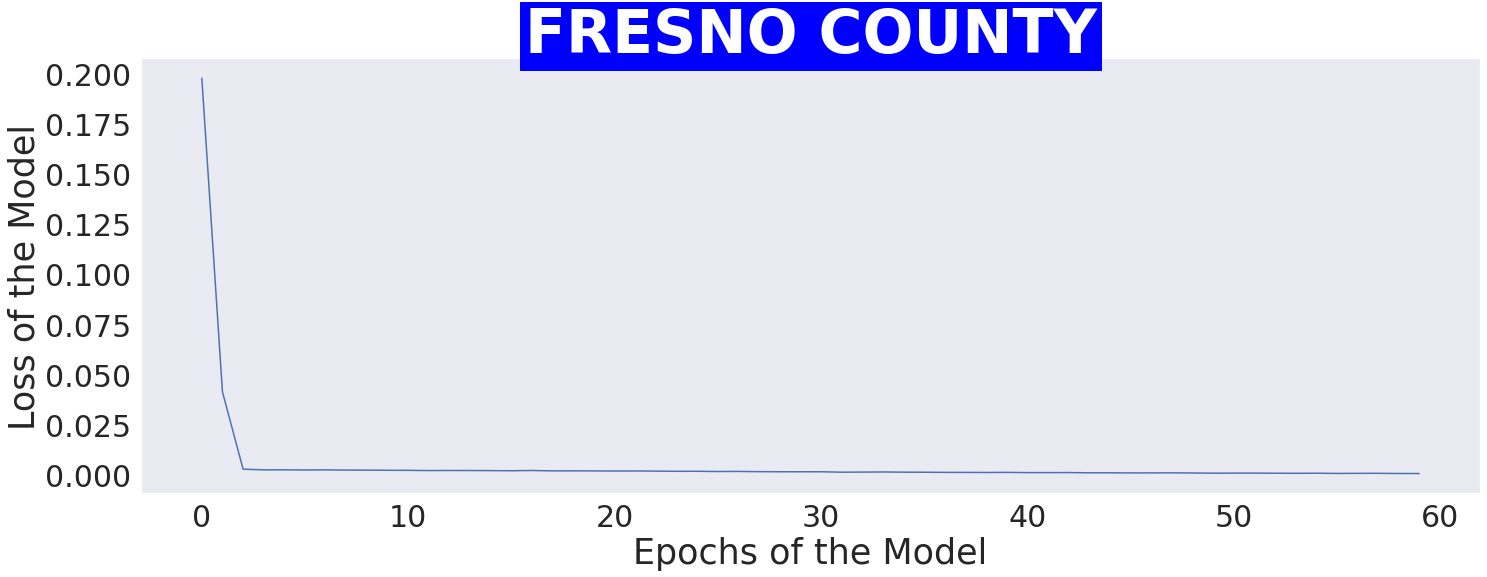

In [ ]:
from matplotlib import pyplot as plt

loss_per_epoch = modelo.history.history['loss']
plt.figure(figsize=(24,8))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Epochs of the Model', fontsize=35)
plt.ylabel('Loss of the Model', fontsize=35)
plt.title("FRESNO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.grid()

In [ ]:
# Print the Prediction in a Array (1 sample, single-step)
y_pred = [y[0] for y in modelo.predict(X_test)]
y_pred = np.array(y_pred)
y_pred

array([0.43413886, 0.45232007, 0.45475093, 0.44791952, 0.4494356 ,
       0.46600986, 0.48392704, 0.48511693, 0.4932185 , 0.4943393 ,
       0.5002647 , 0.50027066, 0.50927657, 0.53604954, 0.560027  ,
       0.5676806 , 0.5551986 , 0.5940409 , 0.6418392 , 0.70258594,
       0.7188517 , 0.7500668 , 0.7906167 , 0.82752657, 0.8620206 ,
       0.91295516, 0.97367907, 1.0572891 , 1.1388158 , 1.2443266 ,
       1.3303634 , 1.4024918 , 1.4240735 , 1.4542984 , 1.4753517 ,
       1.5466741 , 1.6118045 , 1.6771044 ], dtype=float32)

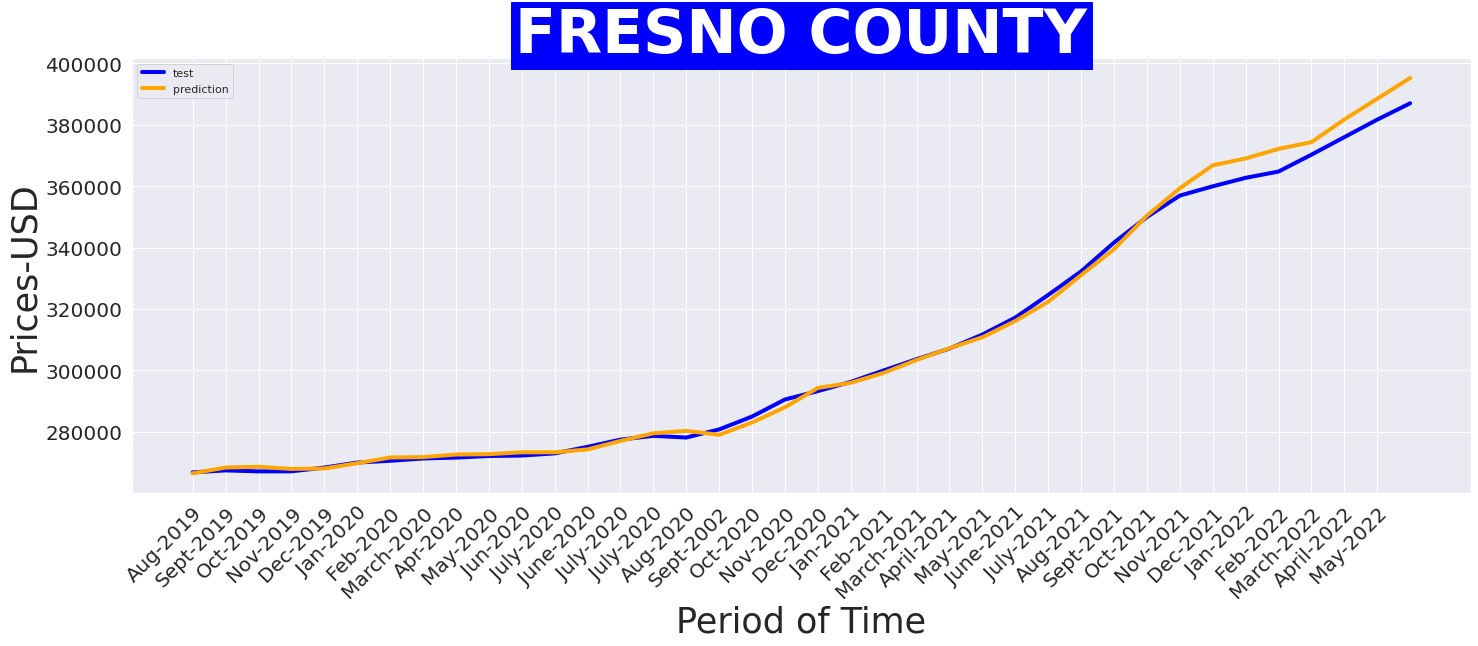

In [ ]:
# Predictions to the Original Scale
import numpy as np
y_test_inv = scaler.inverse_transform(Y_test)
y_pred_inv = y_pred.reshape(-1,1)
y_pred_inv = scaler.inverse_transform(y_pred_inv)

labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2020',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022','Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(y_test_inv[0:38],color='blue',label='test', linewidth=4.0)
plt.plot(y_pred_inv[0:38],color='orange',label='prediction', linewidth=4.0)
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=45, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()

plt.title("FRESNO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
plt.xlabel('Period of Time', fontsize=35)
plt.ylabel('Prices-USD', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend();

No handles with labels found to put in legend.


Text(0.5, 1.0, 'FRESNO COUNTY')

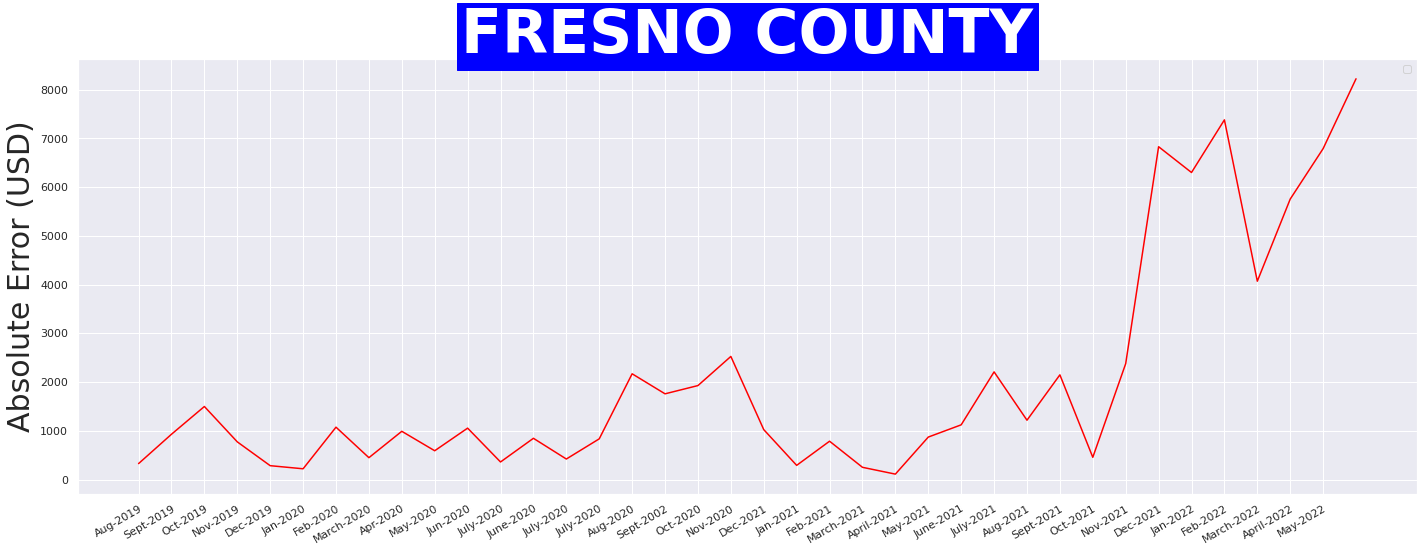

In [ ]:
# Drawing the Absolute Error as USD
labels = ['Aug-2019', 'Sept-2019', 'Oct-2019', 'Nov-2019', 'Dec-2019', 'Jan-2020','Feb-2020','March-2020', 'Apr-2020', 'May-2020', 'Jun-2020', 'July-2020', 'June-2020', 'July-2020', 'July-2020', 'Aug-2020',
          'Sept-2002', 'Oct-2020', 'Nov-2020',	'Dec-2021',	'Jan-2021',	'Feb-2021',	'March-2021',	'April-2021',	'May-2021',	'June-2021',	'July-2021',	'Aug-2021',	'Sept-2021',	'Oct-2021',	'Nov-2021',	'Dec-2021',	'Jan-2022',
          'Feb-2022',	'March-2022',	'April-2022',	'May-2022']
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(24,8))
plt.plot(np.abs(y_test_inv-y_pred_inv), color='red')
ax.set_xticks(x)
ax.set_xticklabels(
    labels, 
    rotation=30, 
    ha="right",  
    rotation_mode="anchor") 
ax.legend()
plt.ylabel('Absolute Error (USD)', fontsize=30)
plt.title("FRESNO COUNTY", fontsize=60,backgroundcolor='blue', color="white", fontweight="bold")
#plt.grid()

In [ ]:
y_pred_inv

array([[266546.6 ],
       [268427.66],
       [268679.2 ],
       [267972.38],
       [268129.25],
       [269844.03],
       [271697.78],
       [271820.9 ],
       [272659.1 ],
       [272775.06],
       [273388.12],
       [273388.75],
       [274320.53],
       [277090.53],
       [279571.3 ],
       [280363.16],
       [279071.75],
       [283090.44],
       [288035.78],
       [294320.78],
       [296003.7 ],
       [299233.28],
       [303428.7 ],
       [307247.47],
       [310816.3 ],
       [316086.12],
       [322368.78],
       [331019.28],
       [339454.25],
       [350370.62],
       [359272.22],
       [366734.8 ],
       [368967.7 ],
       [372094.84],
       [374273.1 ],
       [381652.28],
       [388390.8 ],
       [395146.9 ]], dtype=float32)